## 1) IMPORTING THE DEPENDENCIES

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score


## 2) DATA COLLECTION AND PREPROCESSING

In [113]:
#load the data from csv file to pandas DataFrame
titanic_data = pd.read_csv('/content/train.csv')

In [114]:
# To view first 5 rows in dataset
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [115]:
#To view last 5 rows in the dataset
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [116]:
# To check how many rows and columns that are presented the dataset
titanic_data.shape

(891, 12)

In [117]:
  # To get some information about the data
  titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [118]:
#To check the no.of missing values in the dataset
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 3) HANDLING THE MISSING VALUES

In [119]:
# Drop the "cabin" columns from the dataframe which consists of more no.of
# missing values
titanic_data = titanic_data.drop(columns = 'Cabin',axis = 1)

In [120]:
#replacing the missing values int the 'AGE' column with the mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace = True)


In [121]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [122]:
#finding the mode value of "Embarked" column
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [123]:
print(titanic_data['Embarked'].mode()[0])

S


In [124]:
#replacing the missing values in 'Embarked' columns with mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace = True)

In [125]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [126]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## DATA ANALYSIS

In [127]:
#getting some statistical measures about the data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [128]:
#finding the  no.of people survived and not survived
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

## DATA VISUALIZATION

In [129]:
sns.set()

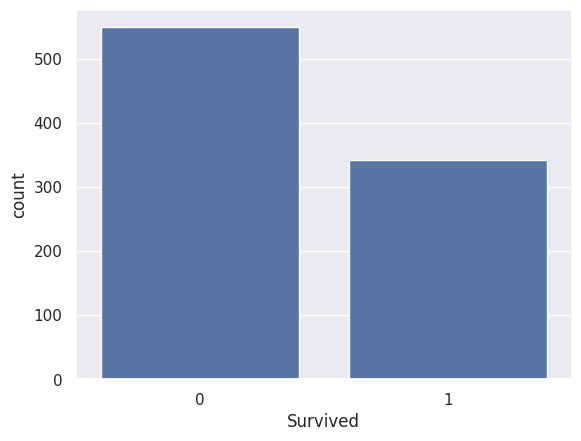

In [130]:
#Making the count plot for the survivee columns
sns.countplot(x='Survived', data=titanic_data)
plt.show()

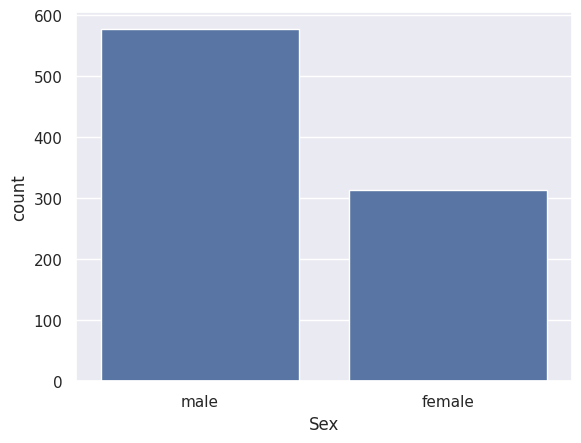

In [131]:
#now doing data visualization to gender column "MALE" or "FEMALE"
sns.countplot(x='Sex',data = titanic_data)
plt.show()

In [132]:
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

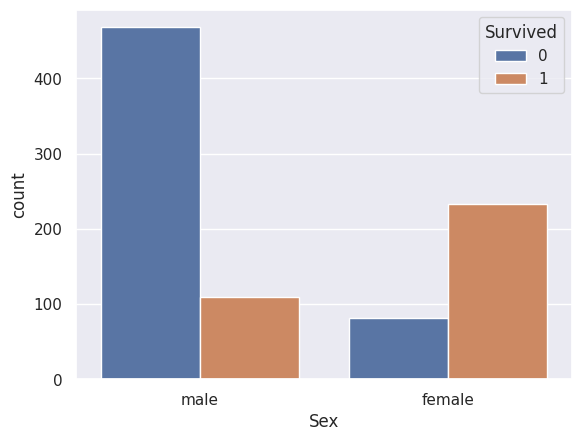

In [133]:
#numbers of seruvivors based on gender male or female
sns.countplot(x='Sex',hue='Survived', data = titanic_data)
plt.show()

In [134]:
titanic_data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

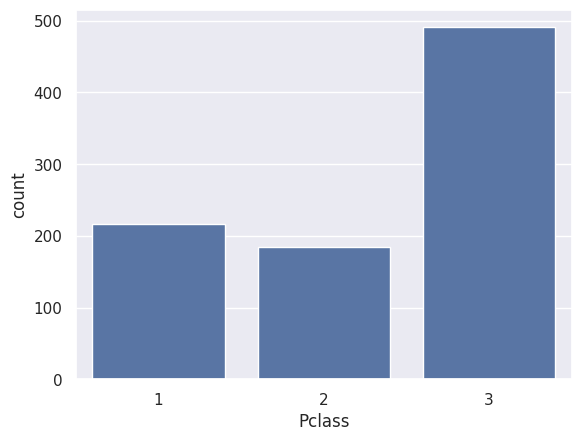

In [135]:
 #making the countplot for pclass
 sns.countplot(x='Pclass',data=titanic_data)


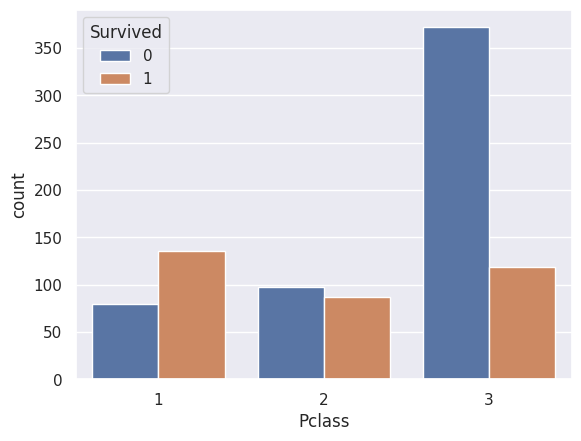

In [136]:
#survived passenger based on pclass
d = sns.countplot(x='Pclass',hue = 'Survived',data=titanic_data)

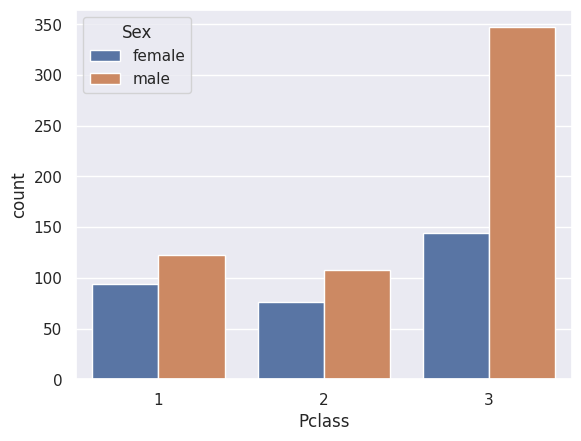

In [137]:
#survived passenger based on pclass
d = sns.countplot(x='Pclass',hue = 'Sex',data=titanic_data)

## 5) LABEL ENCODING THE CATEGORICAL COLUMNS

In [138]:
#Encoding the sex columns which consists of categorical data
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [139]:
#Encoding the Embarked  columns which consists of categorical data
titanic_data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

## Converting Categorical columns

In [140]:
titanic_data.replace({'Sex':{'male':0,'female':1},'Embarked': {'S':0,'C':1,'Q':2 }}, inplace=True)

In [141]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,1


## SEPARATING THE FEATURES AND TARGET

In [142]:
x = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
y= titanic_data['Survived']

In [143]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,0
1,1,1,38.000000,1,0,71.2833,1
2,3,1,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0
887,1,1,19.000000,0,0,30.0000,0
888,3,1,29.699118,1,2,23.4500,0
889,1,0,26.000000,0,0,30.0000,1


In [144]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Splitting the data into training data &test data

In [145]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state=2)

In [146]:
print(x.shape,x_train.shape,x_test.shape)

(891, 7) (712, 7) (179, 7)


## Model Training,Model Evaluation and Accuracy score

using of algorithms to get better accuracy

## 1) Logistic Regression

In [154]:
#training the Logistic Regression model with the testing and training data
#accuracy on training and testing data
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train, y_train)
y_pred_log_reg = log_reg.predict(x_test)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_f1 = f1_score(y_test, y_pred_log_reg)
print(f'Logistic Regression: Accuracy = {log_reg_accuracy:.4f}, F1 Score = {log_reg_f1:.4f}')


Logistic Regression: Accuracy = 0.7821, F1 Score = 0.7153


## 2)KNN

In [152]:
#training the KNN model with the testing and training data
#accuracy on training and testing data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)
print(f'Logistic Regression: Accuracy = {log_reg_accuracy:.4f}, F1 Score = {log_reg_f1:.4f}')




Logistic Regression: Accuracy = 0.7821, F1 Score = 0.7153


In [155]:
#training the DECISION TREE model with the testing and training data
#accuracy on training and testing data
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(x_train, y_train)
y_pred_decision_tree = decision_tree.predict(x_test)
decision_tree_accuracy = accuracy_score(y_test, y_pred_decision_tree)
decision_tree_f1 = f1_score(y_test, y_pred_decision_tree)
print(f'Decision Tree: Accuracy = {decision_tree_accuracy:.4f}, F1 Score = {decision_tree_f1:.4f}')







Decision Tree: Accuracy = 0.7877, F1 Score = 0.7500


In [156]:
# Plotting the Accuracy and F1 Scores
models = ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree']
accuracy_scores = [log_reg_accuracy, knn_accuracy, decision_tree_accuracy]
f1_scores = [log_reg_f1, knn_f1, decision_tree_f1]

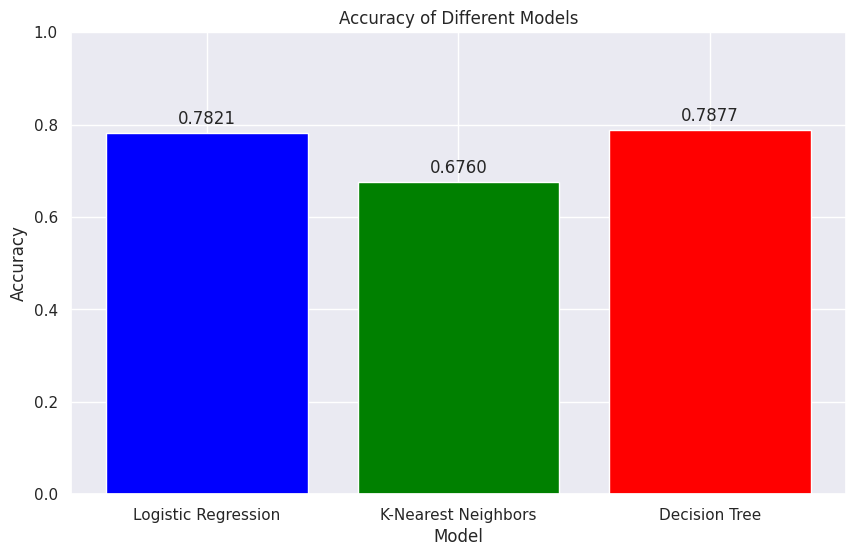

In [170]:
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
for i in range(len(models)):
    plt.text(i, accuracies[i] + 0.02, f'{accuracies[i]:.4f}', ha='center')
plt.show()

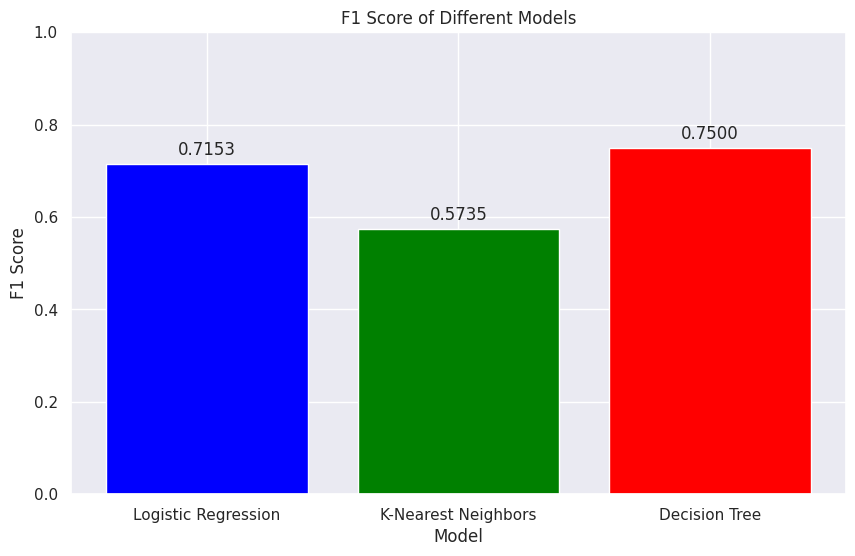

In [171]:
plt.figure(figsize=(10, 6))
plt.bar(models, f1_scores, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Score of Different Models')
plt.ylim(0, 1)  # F1 Score ranges from 0 to 1
for i in range(len(models)):
    plt.text(i, f1_scores[i] + 0.02, f'{f1_scores[i]:.4f}', ha='center')
plt.show()


<Figure size 640x480 with 0 Axes>

In [165]:
plt.show()